In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-07-25 01:45:29--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.004s  

2023-07-25 01:45:29 (13.2 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
#decode the columns sex, smoker and region
dataset = pd.get_dummies(dataset, columns = ["sex", "smoker", "region"], drop_first=True)

In [ ]:
#set the training and target variable
x_columns = dataset.columns.drop('expenses')
x = dataset[x_columns].values
y = dataset['expenses'].values

In [ ]:
#import module to split the train and test data
from sklearn.model_selection import train_test_split
train_dataset, test_dataset, train_labels, test_labels = train_test_split(x, y, train_size=0.8)

In [ ]:
#import module to build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Build the neural network
model = Sequential()

#First layer
model.add(Dense(64, input_dim=x.shape[1], activation='relu'))
#2nd layer
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_absolute_error', metrics=["mean_absolute_error", "mean_squared_error"], optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=True)

#Fit the model
model.fit(train_dataset, train_labels, validation_data=(test_dataset, test_labels), callbacks=[monitor], verbose=2, epochs=10000)

Epoch 1/10000
34/34 - 9s - loss: 13204.0107 - mean_absolute_error: 13204.0107 - mean_squared_error: 321983456.0000 - val_loss: 13351.2607 - val_mean_absolute_error: 13351.2607 - val_mean_squared_error: 320041696.0000 - 9s/epoch - 259ms/step
Epoch 2/10000
34/34 - 0s - loss: 13125.0020 - mean_absolute_error: 13125.0020 - mean_squared_error: 319754624.0000 - val_loss: 13227.1006 - val_mean_absolute_error: 13227.1006 - val_mean_squared_error: 316540288.0000 - 307ms/epoch - 9ms/step
Epoch 3/10000
34/34 - 0s - loss: 12933.6758 - mean_absolute_error: 12933.6758 - mean_squared_error: 314460032.0000 - val_loss: 12927.3359 - val_mean_absolute_error: 12927.3359 - val_mean_squared_error: 308226272.0000 - 340ms/epoch - 10ms/step
Epoch 4/10000
34/34 - 0s - loss: 12511.8037 - mean_absolute_error: 12511.8037 - mean_squared_error: 302650880.0000 - val_loss: 12315.6875 - val_mean_absolute_error: 12315.6875 - val_mean_squared_error: 291835488.0000 - 304ms/epoch - 9ms/step
Epoch 5/10000
34/34 - 0s - loss:

9/9 - 0s - loss: 2785.6162 - mean_absolute_error: 2785.6162 - mean_squared_error: 38546056.0000 - 52ms/epoch - 6ms/step
Testing set Mean Abs Error: 2785.62 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


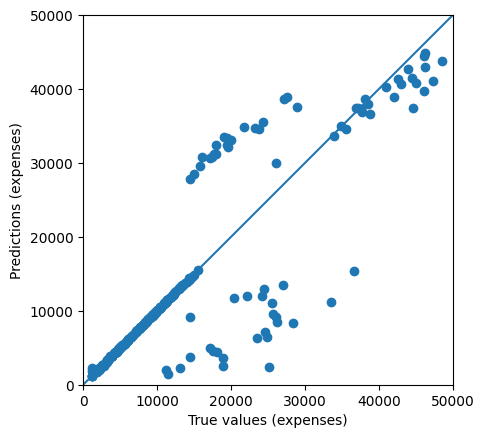

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
